In [50]:
import gpxpy
import pandas as pd
import geopy.distance

In [51]:
# Load gpx.
gpx_path = 'activity_12568414515.gpx'

In [52]:
with open(gpx_path) as f:
    gpx = gpxpy.parse(f)

# Convert to a dataframe one point at a time.
points = []
for segment in gpx.tracks[0].segments:
    for p in segment.points:
        points.append({
            'time': p.time,
            'latitude': p.latitude,
            'longitude': p.longitude,
            'elevation': p.elevation,
        })
df = pd.DataFrame.from_records(points)

### Cumulative distance

In [53]:
coords = [(p.latitude, p.longitude) for p in df.itertuples()]

In [54]:
df['distance'] = [0] + [geopy.distance.distance(from_, to).m for from_, to in zip(coords[:-1], coords[1:])]
df['cumulative_distance'] = df.distance.cumsum()

df['duration'] = df.time.diff().dt.total_seconds().fillna(0)
df['cumulative_duration'] = df.duration.cumsum()
df['pace_metric'] = pd.Series((df.duration / 60) / (df.distance / 1000)).bfill()

In [ ]:
df['time']=pd.to_datetime(df['time'])

In [58]:
df.head()

,time,latitude,longitude,elevation,distance,cumulative_distance,duration,cumulative_duration,pace_metric
0,2023-11-02 11:31:16+00:00,52.244100,6.852351,28.600000,0.000000,0.000000,0.0,0.0,20.092780
1,2023-11-02 11:31:17+00:00,52.244097,6.852361,28.600000,0.829485,0.829485,1.0,1.0,20.092780
2,2023-11-02 11:31:18+00:00,52.244099,6.852377,28.600000,1.101995,1.931481,1.0,2.0,15.124080
3,2023-11-02 11:31:20+00:00,52.244092,6.852450,28.600000,5.059096,6.990577,2.0,4.0,6.588792
4,2023-11-02 11:31:22+00:00,52.244105,6.852549,28.799999,6.902292,13.892869,2.0,6.0,4.829313


<AxesSubplot:>

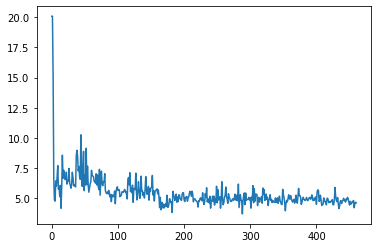

In [57]:
df['pace_metric'].plot()

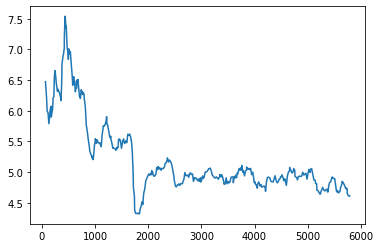

In [59]:
from numpy_ext import rolling_apply
import matplotlib.pyplot as plt


def rolling_metric_pace(duration, distance):
    return (duration.sum() / 60) / (distance.sum() / 1000)


x = df.cumulative_distance
y = rolling_apply(rolling_metric_pace, 10, df.duration.values, df.distance.values)

plt.plot(x, y)

In [62]:
df.tail()

,time,latitude,longitude,elevation,distance,cumulative_distance,duration,cumulative_duration,pace_metric
456,2023-11-02 12:01:04+00:00,52.244446,6.852089,31.0,17.381171,5739.794565,5.0,1788.0,4.794460
457,2023-11-02 12:01:05+00:00,52.244411,6.852096,31.4,3.977967,5743.772531,1.0,1789.0,4.189745
458,2023-11-02 12:01:11+00:00,52.244215,6.852161,32.0,22.230997,5766.003528,6.0,1795.0,4.498224
459,2023-11-02 12:01:16+00:00,52.244102,6.852348,31.6,17.899480,5783.903007,5.0,1800.0,4.655629
460,2023-11-02 12:01:18+00:00,52.244071,6.852442,31.4,7.270530,5791.173538,2.0,1802.0,4.584718


In [60]:
y

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 6.47445775,
       6.41525531, 6.20133274, 5.99007868, 5.97145284, 5.78952093,
       5.92635389, 5.99050595, 6.06792821, 6.07213553, 5.89707252,
       5.98487278, 6.03829448, 6.21148372, 6.2283998 , 6.57192755,
       6.65558982, 6.60002169, 6.57318556, 6.46168081, 6.35272008,
       6.31551777, 6.35130322, 6.32519834, 6.29820721, 6.26376149,
       6.201373  , 6.16725621, 6.40883322, 6.53633231, 6.75515251,
       6.85717896, 6.90347378, 6.91760892, 7.01874967, 7.20091556,
       7.53782548, 7.54023777, 7.35119101, 7.3822071 , 7.01557211,
       6.97088766, 6.8384657 , 7.00924213, 6.92986063, 6.96442219,
       6.75677103, 6.74224256, 6.54896535, 6.4168125 , 6.53417672,
       6.51218764, 6.5572194 , 6.41690382, 6.4836278 , 6.30986871,
       6.36132476, 6.36729205, 6.500643  , 6.45535871, 6.50747324,
       6.45205358, 6.31107793, 6.28306301, 6.23446   , 6.20289

## Threshold Heart Rate

Your estimated  Lactate Threshold Heart Rate (LTHR) is 95% of your 20-minute average heart rate for the test.